In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import networkx as nx

In [2]:
patient_info = pd.read_csv("/home/kh/19Fall/Corona/data/PatientInfo.csv")
region = pd.read_csv("/home/kh/19Fall/Corona/data/Region.csv")
travel_route = pd.read_csv("~/19Fall/Corona/data/travel_route.csv")

### check data

In [3]:
patient_info.head(10)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infected_by,confirmed_date
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,NaN,2020-01-23
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,NaN,2020-01-30
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.002000e+09,2020-01-30
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,NaN,2020-01-30
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,1.000000e+09,2020-01-31
5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,1.000000e+09,2020-01-31
6,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,1.000000e+09,2020-01-31
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,NaN,2020-02-02
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,NaN,2020-02-05
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,1.000000e+09,2020-02-05


In [4]:
travel_route.head(10)

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
5,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,public_transportation,37.590330,127.015221
6,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.589590,127.009766
7,1000000002,5.0,2020-01-27,Seoul,Seongbuk-gu,restaurant,37.592057,127.018898
8,1000000002,5.0,2020-01-27,Seoul,Dongdaemun-gu,store,37.566262,127.065815
9,1000000002,5.0,2020-01-28,Seoul,Seongbuk-gu,etc,37.591669,127.018420


In [5]:
region.head(10)

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909
6,10060,Seoul,Gwangjin-gu,37.538712,127.082366,22,33,3,1.16,13.75,4.8,723
7,10070,Seoul,Guro-gu,37.495632,126.887650,26,34,3,1.00,16.21,5.7,741
8,10080,Seoul,Geumcheon-gu,37.456852,126.895229,18,19,0,0.96,16.15,6.7,475
9,10090,Seoul,Nowon-gu,37.654259,127.056294,42,66,6,1.39,15.40,7.4,952


### infection case

### Spreader

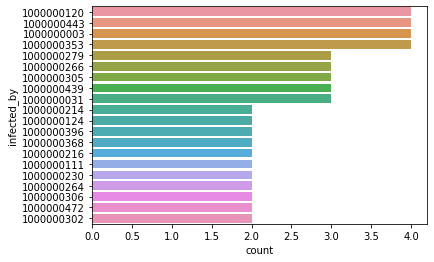

,infected_by,count
24,1000000120,4
64,1000000443,4
1,1000000003,4
53,1000000353,4
44,1000000279,3
43,1000000266,3
49,1000000305,3
62,1000000439,3
10,1000000031,3
33,1000000214,2


In [6]:
spreader_count = None
spreader_count = patient_info[['infected_by']]\
.dropna(axis = 0).astype('int64')\
.groupby('infected_by')['infected_by'].count().reset_index(name = 'count')\
.sort_values(['count'], ascending = False)

top_spreader = spreader_count.head(20)
top_spreader_bar =sns.barplot(x = 'count', y = 'infected_by',
                             data = top_spreader, orient = 'h',
                             order = top_spreader['infected_by'])
top_spreader_bar.set(xlabel='count', ylabel = 'infected_by')
plt.show()

top_spreader.head(20)

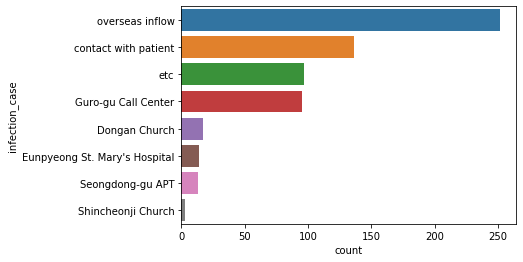

,infection_case,count
7,overseas inflow,252
5,contact with patient,136
6,etc,97
2,Guro-gu Call Center,95
0,Dongan Church,17
1,Eunpyeong St. Mary's Hospital,14
3,Seongdong-gu APT,13
4,Shincheonji Church,3


In [16]:
spreader_count = None
spreader_count = patient_info[['infection_case']]\
.groupby('infection_case')['infection_case'].count().reset_index(name = 'count')\
.sort_values(['count'], ascending = False)

top_spreader = spreader_count.head(20)
top_spreader_bar =sns.barplot(x = 'count', y = 'infection_case',
                             data = top_spreader, orient = 'h',
                             order = top_spreader['infection_case'])
top_spreader_bar.set(xlabel='count', ylabel = 'infection_case')
plt.show()

top_spreader.head(20)